# Simple Linear versus Ridge Regression 

## Step 1:  Getting, understanding, and preprocessing the dataset

We first import the standard libaries and some libraries that will help us scale the data and perform some "feature engineering" by transforming the data into $\Phi_2({\bf x})$

In [53]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures


###  Importing the dataset

In [54]:
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [55]:
#  Create X and Y variables - X holding the .data and Y holding .target 
X = boston_data.data
Y = boston_data.target
#  Reshape Y to be a rank 2 matrix using y.reshape()
Y = Y.reshape(X.shape[0],1) 
# Observe the number of features and the number of labels
print('The number of features is: ', X.shape[1])
# Printing out the features
print('The features: ', boston_data.feature_names)
# The number of examples
print('The number of exampels in our dataset: ', X.shape[0])
# Observing the first 2 rows of the data
print(X[0:2])


The number of features is:  13
The features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
The number of exampels in our dataset:  506
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]


We will also create polynomial feeatures for the dataset to test linear and ridge regression on data with d = 1 and data with d = 2. Feel free to increase the # of degress and see what effect it has on the training and test error. 

In [56]:
# Create a PolynomialFeatures object with degree = 2. Using PolynomialFeatures(degree=2)
# Transform X and save it into X_2 using poly.fit_transform(X)
# Simply copy Y into Y_2 

poly=PolynomialFeatures(degree=2)
X_2 = poly.fit_transform(X)
Y_2 = Y

In [57]:
# the shape of X_2 and Y_2 - should be (506, 105) and (506, 1) respectively
print(X_2.shape)
print(Y_2.shape)
print(X_2)


(506, 105)
(506, 1)
[[1.00000000e+00 6.32000000e-03 1.80000000e+01 ... 1.57529610e+05
  1.97656200e+03 2.48004000e+01]
 [1.00000000e+00 2.73100000e-02 0.00000000e+00 ... 1.57529610e+05
  3.62766600e+03 8.35396000e+01]
 [1.00000000e+00 2.72900000e-02 0.00000000e+00 ... 1.54315409e+05
  1.58310490e+03 1.62409000e+01]
 ...
 [1.00000000e+00 6.07600000e-02 0.00000000e+00 ... 1.57529610e+05
  2.23851600e+03 3.18096000e+01]
 [1.00000000e+00 1.09590000e-01 0.00000000e+00 ... 1.54802902e+05
  2.54955600e+03 4.19904000e+01]
 [1.00000000e+00 4.74100000e-02 0.00000000e+00 ... 1.57529610e+05
  3.12757200e+03 6.20944000e+01]]


# Your code goes here

In [58]:
# Define the get_coeff_ridge_normaleq function. Use the normal equation method.
# Return w values

def get_coeff_ridge_normaleq(X_train, Y_train, alpha):
    X_train = np.c_[X_train,np.ones((X_train.shape[0],1))]
    dot_of_XT_X = X_train.transpose().dot(X_train)
    matrix_1 = np.linalg.pinv(dot_of_XT_X + alpha * np.identity (dot_of_XT_X.shape[1]))
    matrix_2 = X_train.transpose().dot(Y_train)
    w = matrix_1.dot(matrix_2)
    return w



In [59]:
# Define the get_coeff_ridge_normaleq function. Use the normal equation method.
# Return w values

def get_coeff_linear_normaleq(X_train, Y_train):
    X_train = np.c_[X_train,np.ones((X_train.shape[0],1))]
    dot_of_XT_X = X_train.transpose().dot(X_train)
    inv_dot_of_XT_X = np.linalg.pinv(dot_of_XT_X)
    dot_of_XT_Y = X_train.transpose().dot(Y_train)
    w = inv_dot_of_XT_X.dot(dot_of_XT_Y)
    return w



In [60]:
# Define the evaluate_err_ridge function.
# Return the train_error and test_error values


def evaluate_err(X_train, X_test, y_train, y_test, w): 
#     pred_train=prediction using w and X_tran+np.mean(y_train)
#     pred_test=prediction using w and X_test
#     remember to add the mean back
#     train_error=...
#     test_error=...
    X_train = np.c_[X_train,np.ones((X_train.shape[0],1))]
    X_test = np.c_[X_test,np.ones((X_test.shape[0],1))]
    pred_train = X_train.dot(w)
    pred_test = X_test.dot(w)
    train_error = np.square(y_train-pred_train).mean()
    test_error = np.square(y_test-pred_test).mean()
    return train_error, test_error


In [61]:
def k_fold_cross_validation(k, X, y, alpha,linearORridge):
    kf = KFold(n_splits=k, random_state=21, shuffle=True)
    total_E_val_test = 0
    total_E_val_train = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Centering the data so we do not need the intercept term (we could have also chose w_0=average y value)
        # Subtract y_train_mean from y_train and y_test
        y_train_mean = np.mean(y_train)
        y_train = y_train-y_train_mean
        y_test = y_test-y_train_mean
        # Scaling the data matrix
        # Using scaler=preprocessing.StandardScaler().fit(...)
        # And scaler.transform(...)
        scaler=preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # Determine the training error and the test error
        # Use get_coeff_linear_normaleq or get_coeff_ridge_normaleq to get w
        # And use evaluate_err() 
        if (linearORridge=="ridge"):
            vtraintotal,vtesttotal= evaluate_err(X_train,X_test, y_train, y_test ,get_coeff_ridge_normaleq(X_train, y_train, alpha))
            total_E_val_train+=vtraintotal
            total_E_val_test+=vtesttotal
        elif (linearORridge=="linear"):
            vtraintotal,vtesttotal= evaluate_err(X_train,X_test, y_train, y_test ,get_coeff_linear_normaleq(X_train, y_train))
            total_E_val_train+=vtraintotal
            total_E_val_test+=vtesttotal
            
    return  total_E_val_test/k, total_E_val_train/k
       ##############
    


In [62]:
# print the error for the both linear regression and ridge regression
# the error should include both training error and testing error
total_E_val_test_linear, total_E_val_train_linear = k_fold_cross_validation(10,X,Y,0,"linear")
print("Average Linear(Standard) Test Error: ",total_E_val_test_linear)
print("Average Linear(Standard) Train Error: ",total_E_val_train_linear)
total_E_val_test_ridge, total_E_val_train_ridge = k_fold_cross_validation(10,X_2,Y_2,0,"linear")
print("Average Linear(Polynomial) Test Error: ",total_E_val_test_ridge)
print("Average Linear(Polynomial) Train Error: ",total_E_val_train_ridge)
total_E_val_test_ridge, total_E_val_train_ridge = k_fold_cross_validation(10,X,Y,10,"ridge")
print("Average Ridge(Standard) Test Error: ",total_E_val_test_ridge)
print("Average Ridge(Standard) Train Error: ",total_E_val_train_ridge)
total_E_val_test_ridge, total_E_val_train_ridge = k_fold_cross_validation(10,X_2,Y_2,10,"ridge")
print("Average Ridge(Polynomial) Test Error: ",total_E_val_test_ridge)
print("Average Ridge(Polynomial) Train Error: ",total_E_val_train_ridge)

Average Linear(Standard) Test Error:  23.636068605428143
Average Linear(Standard) Train Error:  21.806183575851065
Average Linear(Polynomial) Test Error:  11.854968234573025
Average Linear(Polynomial) Train Error:  5.8088208160124655
Average Ridge(Standard) Test Error:  23.68858300163877
Average Ridge(Standard) Train Error:  21.89290115757019
Average Ridge(Polynomial) Test Error:  13.476138001136126
Average Ridge(Polynomial) Train Error:  10.049055874118872


In [63]:
print("Ridge Normal")
print("\n")
for i in np.logspace(1, 7, num=13):
  test, train = k_fold_cross_validation(10,X,Y,i,"ridge")
  print("i = "+str(i))
  print("Test Error: "+str(test)+" Train Error: "+str(train))
  print("\n")



Ridge Normal


i = 10.0
Test Error: 23.68858300163877 Train Error: 21.89290115757019


i = 31.622776601683793
Test Error: 24.017840297386172 Train Error: 22.285444055697504


i = 100.0
Test Error: 25.293852553695146 Train Error: 23.725488384882084


i = 316.22776601683796
Test Error: 29.45729622289678 Train Error: 28.166554098540114


i = 1000.0
Test Error: 39.48949335939871 Train Error: 38.53214872734357


i = 3162.2776601683795
Test Error: 54.64719107794948 Train Error: 54.00702649955448


i = 10000.0
Test Error: 69.71851750884511 Train Error: 69.2597817132532


i = 31622.776601683792
Test Error: 78.92162110435102 Train Error: 78.53074243629268


i = 100000.0
Test Error: 82.7724042894599 Train Error: 82.40325012491367


i = 316227.7660168379
Test Error: 84.11748625821778 Train Error: 83.75514887733652


i = 1000000.0
Test Error: 84.5569941832673 Train Error: 84.19680334862025


i = 3162277.6601683795
Test Error: 84.69744416333866 Train Error: 84.33793107733854


i = 10000000.0
Test E

In [64]:
print("Ridge Polynomail")
print("\n")
for i in np.logspace(1, 7, num=13):
  test, train = k_fold_cross_validation(10,X_2,Y_2,i,"ridge")
  print("i = "+str(i))
  print("Test Error: "+str(test)+" Train Error: "+str(train))
  print("\n")


Ridge Polynomail


i = 10.0
Test Error: 13.476138001136126 Train Error: 10.049055874118872


i = 31.622776601683793
Test Error: 15.829601969051154 Train Error: 12.75170626904678


i = 100.0
Test Error: 18.98001881500995 Train Error: 16.222690593210807


i = 316.22776601683796
Test Error: 22.068692308062722 Train Error: 19.70025364640986


i = 1000.0
Test Error: 26.21847559440484 Train Error: 24.28745798310889


i = 3162.2776601683795
Test Error: 34.580266018800174 Train Error: 33.086668319850524


i = 10000.0
Test Error: 47.78952058756749 Train Error: 46.76199935941409


i = 31622.776601683792
Test Error: 62.646288813443356 Train Error: 62.009001916836056


i = 100000.0
Test Error: 74.73795160641836 Train Error: 74.28758894586744


i = 316227.7660168379
Test Error: 81.07998618951191 Train Error: 80.69255135236737


i = 1000000.0
Test Error: 83.53524235105219 Train Error: 83.16723569778432


i = 3162277.6601683795
Test Error: 84.36776579104057 Train Error: 84.00579580096273


i = 100000

## If you are given a choice of predicting future housing prices using one of the models you have learned above, which one would you choose and why? State the parameters of that model.



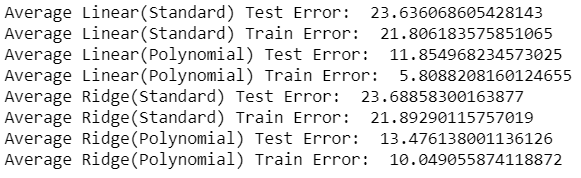

#### Polynomial or Normal?
I would choose polynomial because when I compared between the results from X,y and X_2,y_2, I found out that X_2, y_2 is better than x,y because the train error and the test error was relativley smaller. So If I want to predict future housing prices, I would use polynomial data. Average Linear Polynomial < Average Linear Standard, and Average Ridge Polynomial< Average Ridge Standard. Therefore I would with polynomial

#### Linear or Ridge?
I would choose the linear model. Overall after analyzing the results, the linear model had lower training errors and lower test errors, so I believe that its a better fit, as A model. Average Linear Standard < Average Ridge Standard, and Average linear Polynomial< Average Linear Polynomial. Therefore I would go with Linear


I would choose linear polynomial as it had the lowest train errors with 11.85% for test error and 5.80% for train error.